In [2]:
#created: 16/5/23
#by Kyriakos Stratakos, Nikolas Perreas

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#read data 
df = pd.read_csv('data.csv')

In [5]:
print(df.isnull().sum())


Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                             3610
dtype: int64


In [6]:
#change false negative values in daily tests and cases to 
df.loc[df['Cases'] <0, 'Cases'] *= -1
df.loc[df['Daily tests'] <0, 'Daily tests'] *= -1

In [7]:
#find deaths for each day
df.loc[df['Deaths'].isnull(),'Deaths'] = 0
df['Deaths'] = df['Deaths']-df['Deaths'].shift(1)
df.loc[df['Deaths'] <0, 'Deaths'] *= 0


In [8]:
#debug block

In [9]:
#prints the sum of null lines for each column 
print(df.isnull().sum())

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                                1
dtype: int64


In [10]:
#group data by country 
groupCountry = df.groupby(['Entity'])
groupContinent = df.groupby(['Continent'])

In [11]:
percentages = groupCountry['Daily tests','Cases','Deaths'].apply(lambda x: 100*x.isna().sum()/(x.isna().sum()+x.count()))

C:\Users\KYRIAK~1\AppData\Local\Temp/ipykernel_1916/567046852.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  percentages = groupCountry['Daily tests','Cases','Deaths'].apply(lambda x: 100*x.isna().sum()/(x.isna().sum()+x.count()))


In [28]:
print(percentages[(percentages['Daily tests']>80)|(percentages['Daily tests']>80)])

           Daily tests      Cases   Deaths
Entity                                    
Albania       1.891892   3.513514  0.27027
Algeria      99.189189   0.000000  0.00000
Argentina     1.980198  10.148515  0.00000
Armenia      85.479452   0.000000  0.00000
Australia    43.500000   0.000000  0.00000


In [13]:
groupCountry['Daily tests','Cases','Deaths'].describe()


C:\Users\KYRIAK~1\AppData\Local\Temp/ipykernel_1916/1175304890.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupCountry['Daily tests','Cases','Deaths'].describe()


Daily tests                                                   \
                    count           mean            std     min        25%   
Entity                                                                       
Albania             363.0    1192.831956    1198.268551     1.0     259.00   
Algeria               3.0    1033.333333    1274.100990   200.0     300.00   
Argentina           396.0   15390.744949   13501.779202     1.0    2185.25   
Armenia              53.0    1880.339623    1093.802382   117.0    1035.00   
Australia           226.0   41312.128319   20579.530108  4357.0   26967.25   
...                   ...            ...            ...     ...        ...   
United States       360.0  912236.261111  582695.207923   183.0  455644.25   
Uruguay             267.0    3013.138577    2491.044201   145.0     856.50   
Vietnam              58.0    5753.293103   12763.597902    10.0      87.25   
Zambia              308.0    3390.600649    3423.042797    17.0     651.00   
Zimbabwe            289.0    1272.079585    1040.529455    96.0     571.00   

                                                Cases                ...  \
                    50%         75%        max  count          mean  ...   
Entity                                                               ...   
Albania           812.0     1916.50     4562.0  357.0  2.360359e+04  ...   
Algeria           400.0     1450.00     2500.0  370.0  4.565502e+04  ...   
Argentina       13148.0    25307.75    48659.0  363.0  7.173078e+05  ...   
Armenia          1620.0     2858.00     4198.0  365.0  6.676794e+04  ...   
Australia       39446.0    55721.25   101274.0  400.0  1.697356e+04  ...   
...                 ...         ...        ...    ...           ...  ...   
United States  885230.5  1293433.00  2238400.0  404.0  7.991328e+06  ...   
Uruguay          2316.0     4583.50    13346.0  353.0  8.799329e+03  ...   
Vietnam          3011.5     5926.50    92374.0  403.0  8.168933e+02  ...   
Zambia           1796.0     5310.00    14995.0  348.0  1.571817e+04  ...   
Zimbabwe          939.0     1608.00     5055.0  346.0  8.981931e+03  ...   

                                       Deaths                                 \
                       75%         max  count         mean          std  min   
Entity                                                                         
Albania           39014.00    107167.0  369.0     4.867209     5.135261  0.0   
Algeria           80951.00    113092.0  370.0     8.062162     5.072795  0.0   
Argentina       1421670.00   2107365.0  404.0   128.626238   205.812031  0.0   
Armenia          134768.00    172058.0  365.0     8.745205     9.002946  0.0   
Australia         27809.75     28978.0  400.0     2.275000     5.501822  0.0   
...                    ...         ...    ...          ...          ...  ...   
United States  11873710.50  28605669.0  404.0  1270.027228  1041.402998  0.0   
Uruguay            6225.00     57994.0  353.0     1.722380     3.075191  0.0   
Vietnam            1304.50      2448.0  403.0     0.089330     0.425506  0.0   
Zambia            17761.75     78534.0  348.0     3.135057     6.394489  0.0   
Zimbabwe          10516.25     36089.0  346.0     4.228324     9.633721  0.0   

                                                
                  25%     50%      75%     max  
Entity                                          
Albania          1.00     4.0     7.00    21.0  
Algeria          5.00     8.0    10.00    30.0  
Argentina        8.00    84.5   198.25  3351.0  
Armenia          2.00     6.0    12.00    41.0  
Australia        0.00     0.0     2.00    59.0  
...               ...     ...      ...     ...  
United States  509.25  1038.5  1799.25  4398.0  
Uruguay          0.00     0.0     1.00    17.0  
Vietnam          0.00     0.0     0.00     3.0  
Zambia           0.00     0.0     3.00    67.0  
Zimbabwe         0.00     0.0     3.00    70.0  

[104 rows x 24 columns]

In [14]:
groupContinent['Daily tests','Cases','Deaths'].describe()


C:\Users\KYRIAK~1\AppData\Local\Temp/ipykernel_1916/3799079876.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupContinent['Daily tests','Cases','Deaths'].describe()


Daily tests                                              \
                    count           mean            std  min      25%   
Continent                                                               
Africa             5050.0    4569.912277    8412.412179  1.0   585.25   
Asia               8222.0   58471.975553  160520.878545  1.0  4606.25   
Europe            10455.0   28919.758393   77972.543095  1.0  2013.00   
North America      3453.0  103603.752679  334345.344156  1.0   817.00   
Oceania             803.0   13487.881694   20787.293180  1.0   102.00   
South America      2594.0   12316.882806   16150.201937  1.0  1629.00   

                                              Cases                 ...  \
                   50%      75%        max    count           mean  ...   
Continent                                                           ...   
Africa          1425.5   4067.5    77167.0   7412.0   56631.205343  ...   
Asia           13473.0  35764.5  1492409.0  10582.0  351392.865054  ...   
Europe          7072.0  20180.0  2945871.0  12212.0  176893.944399  ...   
North America   2923.0  14237.0  2238400.0   4012.0  926706.699402  ...   
Oceania         3365.0  17519.5   101274.0   1114.0    6648.859066  ...   
South America   3878.5  19155.5    93133.0   2886.0  339324.664934  ...   

                                       Deaths                               \
                     75%         max    count        mean         std  min   
Continent                                                                    
Africa          37809.00   1513393.0   7433.0   11.523073   46.824125  0.0   
Asia           243397.25  11112241.0  10604.0   42.962090  122.917131  0.0   
Europe         128502.00   4188827.0  12304.0   44.550796  130.449259  0.0   
North America  160490.50  28605669.0   4082.0  181.693288  522.758506  0.0   
Oceania          7135.75     28978.0   1120.0    0.837500    3.462350  0.0   
South America  472931.00   2251690.0   2928.0   71.670423  171.636604  0.0   

                                         
               25%   50%    75%     max  
Continent                                
Africa         0.0   1.0   6.00   844.0  
Asia           0.0   3.0  26.00  2003.0  
Europe         0.0   4.0  24.00  1826.0  
North America  0.0   6.0  30.00  4398.0  
Oceania        0.0   0.0   0.00    59.0  
South America  2.0  21.0  85.25  4143.0  

[6 rows x 24 columns]

In [15]:
def plotDeaths(country):
    #function plots deaths per day for each country
    filtered_df = df[df['Entity'] == country]
    filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

    filtered_df.set_index('Date', inplace=True)


    plt.plot(filtered_df.index, filtered_df['Deaths'])
    plt.xlabel('Date')
    plt.ylabel('Daily Deaths')
    plt.title(f'Daily Deaths in {country}')
    plt.grid(True)
    plt.show()
    return




C:\Users\KYRIAK~1\AppData\Local\Temp/ipykernel_1916/1119085229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


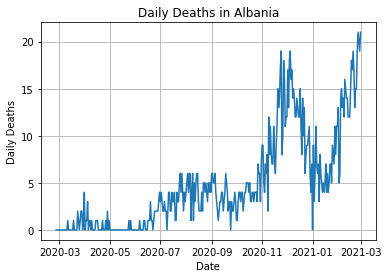

C:\Users\KYRIAK~1\AppData\Local\Temp/ipykernel_1916/1119085229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


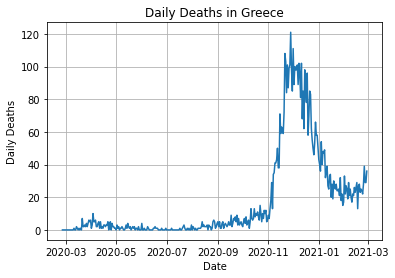

C:\Users\KYRIAK~1\AppData\Local\Temp/ipykernel_1916/1119085229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


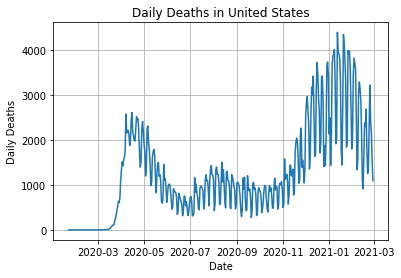

C:\Users\KYRIAK~1\AppData\Local\Temp/ipykernel_1916/1119085229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


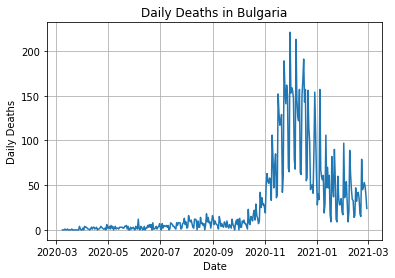

In [16]:
plotDeaths('Albania')
plotDeaths('Greece')
plotDeaths('United States')
plotDeaths('Bulgaria')




In [17]:
def plotTests(country):
    #function plots deaths per day for each country
    filtered_df = df[df['Entity'] == country]
    filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

    filtered_df.set_index('Date', inplace=True)


    plt.plot(filtered_df.index, filtered_df['Daily tests'])
    plt.xlabel('Date')
    plt.ylabel('Daily Tests')
    plt.title(f'Daily Tests in {country}')
    plt.grid(True)
    plt.show()
    return


C:\Users\KYRIAK~1\AppData\Local\Temp/ipykernel_1916/2498466969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


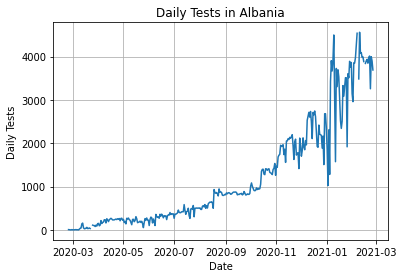

In [18]:
plotTests('Albania')

In [19]:
def plotCases(country):
    #function plots deaths per day for each country
    filtered_df = df[df['Entity'] == country]
    filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

    filtered_df.set_index('Date', inplace=True)
    filtered_df['Cases'] = filtered_df['Cases'].diff()


    plt.plot(filtered_df.index, filtered_df['Cases'])
    plt.xlabel('Date')
    plt.ylabel('Daily Cases')
    plt.title(f'Daily Cases in {country}')
    plt.grid(True)
    plt.show()
    return

C:\Users\KYRIAK~1\AppData\Local\Temp/ipykernel_1916/3668716564.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
C:\Users\KYRIAK~1\AppData\Local\Temp/ipykernel_1916/3668716564.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cases'] = filtered_df['Cases'].diff()


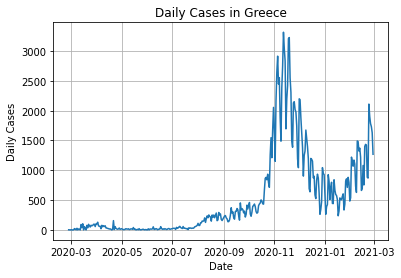

In [20]:
plotCases('Greece')

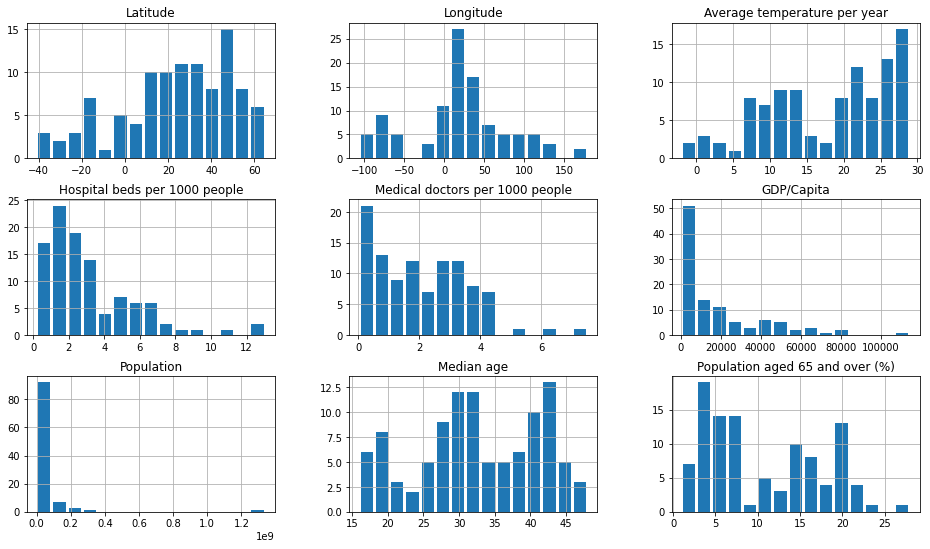

In [21]:
columns = ['Date', 'Daily tests', 'Cases', 'Deaths']
df.drop(columns, axis=1).drop_duplicates().hist(bins=15, figsize=(16, 9), rwidth=0.8)
plt.show()


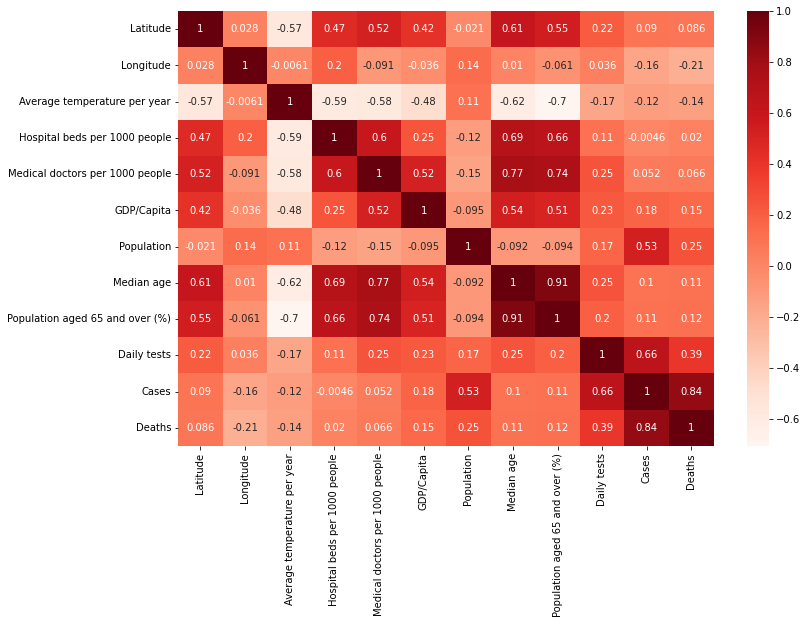

In [22]:
df_last = df.groupby('Entity').tail(5).drop(['Entity', 'Date'], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_last.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()
